In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('diabetes.csv')

In [20]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [19]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [26]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split

In [27]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [28]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.33)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
classfier=DecisionTreeClassifier(max_depth=3)

In [54]:
classfier.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
from sklearn import tree

[Text(0.5, 0.875, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.25, 0.625, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.125, 0.375, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.0625, 0.125, 'gini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.1875, 0.125, 'gini = 0.469\nsamples = 48\nvalue = [30, 18]'),
 Text(0.375, 0.375, 'x[5] <= 26.95\ngini = 0.487\nsamples = 181\nvalue = [105, 76]'),
 Text(0.3125, 0.125, 'gini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 145\nvalue = [71, 74]'),
 Text(0.75, 0.625, 'x[5] <= 28.7\ngini = 0.232\nsamples = 82\nvalue = [11, 71]'),
 Text(0.625, 0.375, 'x[5] <= 25.35\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6875, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.875, 0.375, 'x[6] <= 1.428\ngini = 0.157\nsamples = 70\nvalue = [6, 64]'),


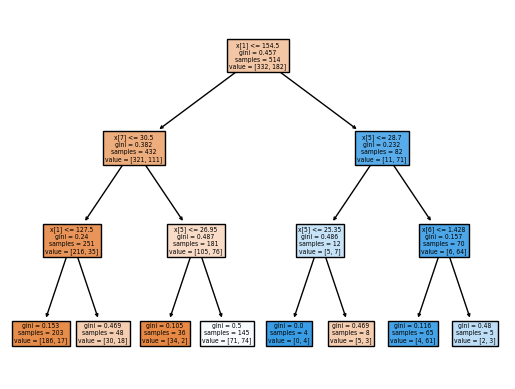

In [57]:
tree.plot_tree(classfier,filled=True)

In [33]:
# Cart is used because the target variable is binary 

In [34]:
Y_pred=classfier.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [37]:
print(accuracy_score(Y_pred,Y_test))
print(precision_score(Y_pred,Y_test))
print(f1_score(Y_pred,Y_test))
print(recall_score(Y_pred,Y_test))

0.7047244094488189
0.6395348837209303
0.5945945945945946
0.5555555555555556


In [38]:
from sklearn.metrics import confusion_matrix,roc_curve

In [39]:
print(confusion_matrix(Y_pred,Y_test))
print(roc_curve(Y_pred,Y_test))

[[124  31]
 [ 44  55]]
(array([0. , 0.2, 1. ]), array([0.        , 0.55555556, 1.        ]), array([2, 1, 0]))


In [45]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.6211751302083334, 0.9615384615384616, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.33349609375, 0.8846153846153846, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.19010416666666666, 0.8076923076923077, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.125, 0.7307692307692307, 'x[5] <= 45.45\ngini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.11458333333333333, 0.6538461538461539, 'x[0] <= 6.5\ngini = 0.13\nsamples = 200\nvalue = [186, 14]'),
 Text(0.10416666666666667, 0.5769230769230769, 'x[1] <= 104.5\ngini = 0.122\nsamples = 199\nvalue = [186, 13]'),
 Text(0.041666666666666664, 0.5, 'x[4] <= 156.0\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(0.020833333333333332, 0.4230769230769231, 'x[3] <= 41.0\ngini = 0.019\nsamples = 104\nvalue = [103, 1]'),
 Text(0.010416666666666666, 0.34615384615384615, 'gini = 0.0\nsamples = 97\nvalue = [97, 0]'),
 Text(0.03125, 0.34615384615384615, 'x[4]

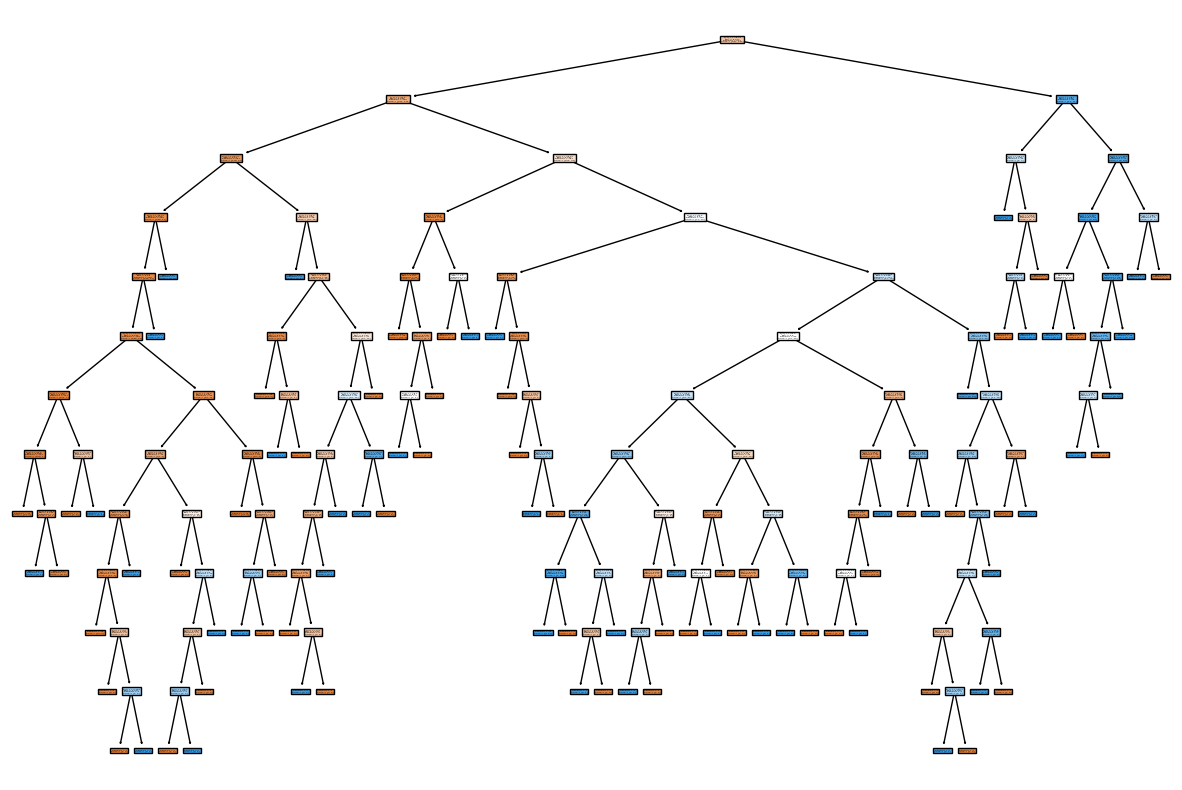

In [46]:
plt.figure(figsize=(15,10))
tree.plot_tree(classfier,filled=True)